In [53]:
import graph_tool.all as gt
import matplotlib
import random

In [98]:
def read_edgelist(filename, graph, weighted=False):
    with open(filename) as f:
        data = f.readlines()
        data = [item.strip() for item in data]
        data = [item.split(" ") for item in data]
        eprop = None
        if weighted:
            eprop = graph.new_edge_property("float")
            g.edge_properties["weight"] = eprop
            data = [[int(item[0]), int(item[1]), float(item[2])] for item in data]
        else:
            data = [[int(item[0]), int(item[1])] for item in data]
        vertexDict = {}
        for edge in data:
            # Check if we have made a vertex object for the start/end of edge
            if edge[0] in vertexDict:
                v1 = vertexDict[edge[0]]
            else:
                v = graph.add_vertex()
                vertexDict[edge[0]] = v
                v1 = vertexDict[edge[0]]
            if edge[1] in vertexDict:
                v2 = vertexDict[edge[1]]
            else:
                # Create the second vertex
                v = graph.add_vertex()
                vertexDict[edge[1]] = v
                v2 = vertexDict[edge[1]]
            e = graph.add_edge(v1, v2)
            if weighted:
                eprop[e] = edge[2]
        return graph, vertexDict, eprop

In [167]:
g = gt.Graph()

g, vertexDict, e_weight = read_edgelist("inf-USAir97.mtx", g, True)
cap = g.edge_properties["weight"]

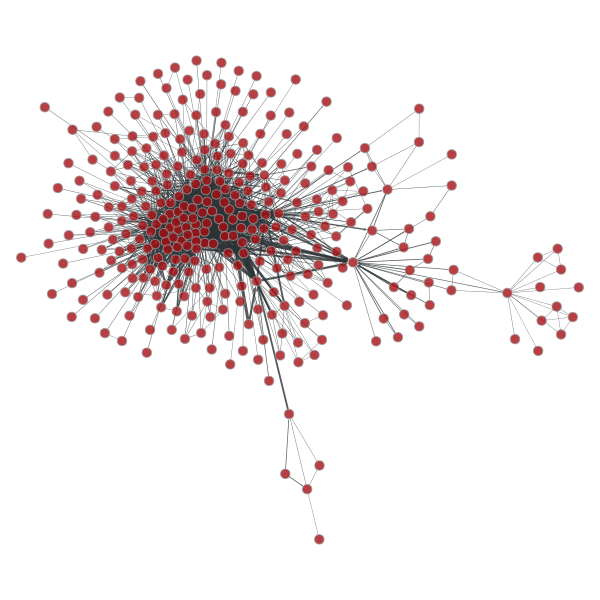

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b0850a90, at 0x7f10b3abe5c0>

In [168]:
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos, edge_pen_width=gt.prop_to_size(cap, mi=.3, ma=3, power=1))

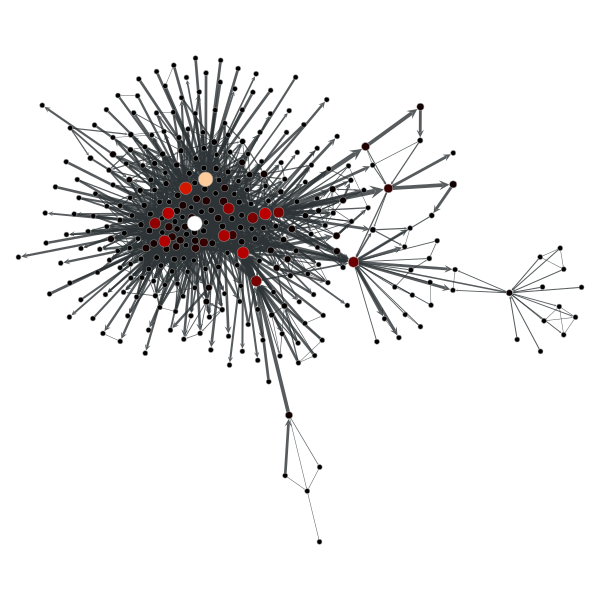

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b0850a90, at 0x7f10b3abe5c0>

In [169]:
vp, ep = gt.betweenness(g)
gt.graph_draw(g, pos = pos, vertex_fill_color=vp, vertex_size=gt.prop_to_size(vp, mi=5, ma=15),edge_pen_width=gt.prop_to_size(ep, mi=0.5, ma=5), vcmap=matplotlib.cm.gist_heat,vorder=vp)

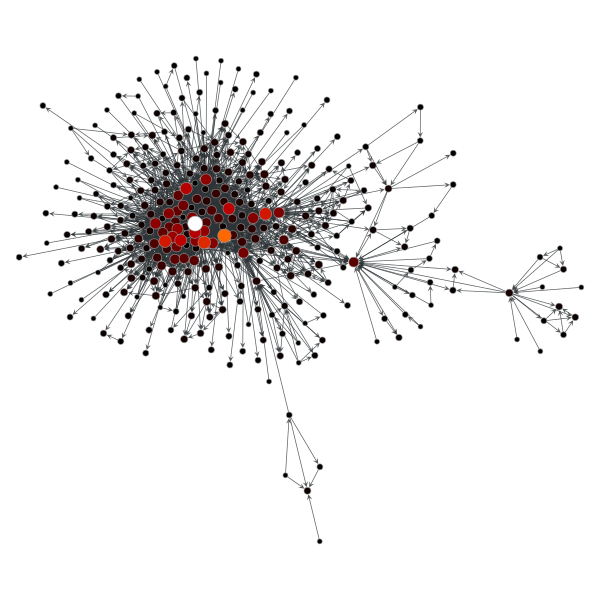

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b0850a90, at 0x7f10b3abe5c0>

In [170]:
x = gt.katz(g)
gt.graph_draw(g, pos = pos, vertex_fill_color=x,vertex_size=gt.prop_to_size(x, mi=5, ma=15),vcmap=matplotlib.cm.gist_heat,vorder=x)


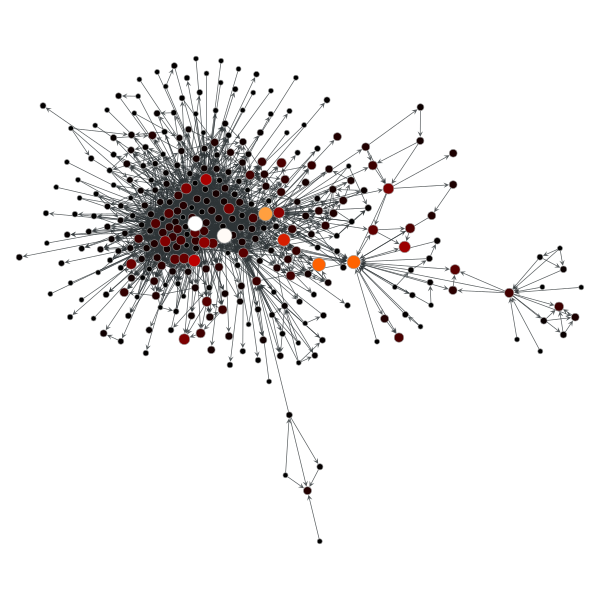

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b0850a90, at 0x7f10b3abe5c0>

In [171]:
pr = gt.pagerank(g)
gt.graph_draw(g, pos = pos,vertex_size=gt.prop_to_size(pr, mi=5, ma=15), vertex_fill_color=pr, vcmap=matplotlib.cm.gist_heat,vorder=pr)

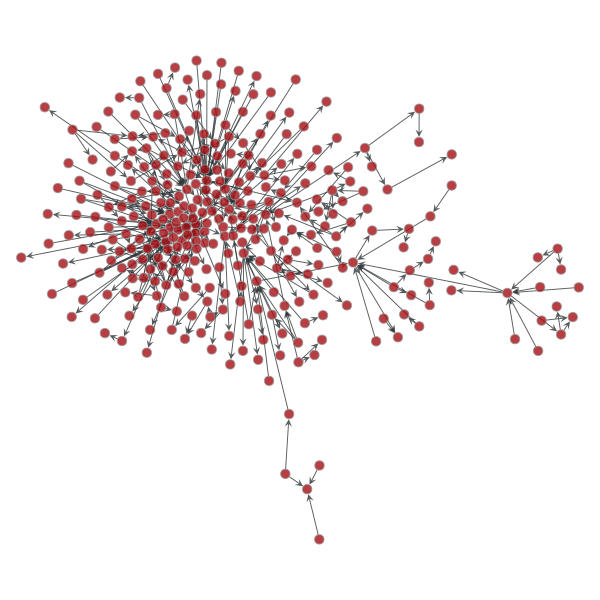

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b0850a90, at 0x7f10b3abe5c0>

In [172]:
## gt.graph_draw(g, pos=pos)
tree = gt.min_spanning_tree(g)
u = gt.GraphView(g, efilt=tree)
gt.graph_draw(u, pos=pos)

0.012700000000000001


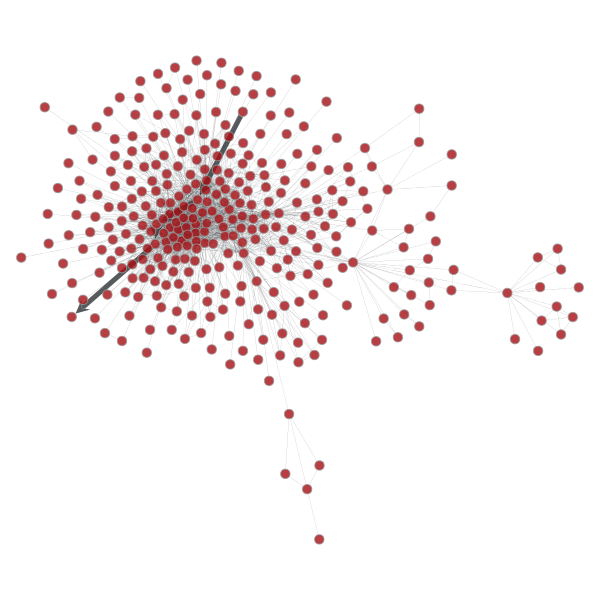

78.24379999999987


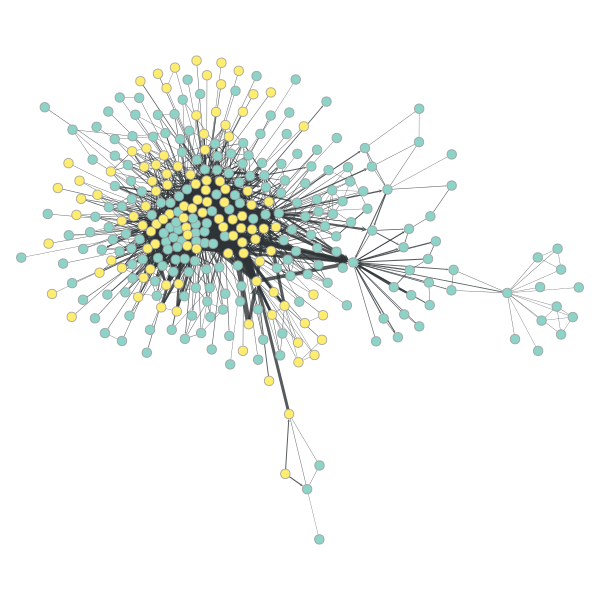

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f10b0850a90, at 0x7f10b3abe5c0>

In [175]:
sources = []
sinks = []
for v in g.vertices():
    if v.out_degree() == 0:
        sinks.append(v)
    if v.in_degree() == 0:
        sources.append(v)

source = random.choice(sources)
sink = random.choice(sinks)
res = gt.push_relabel_max_flow(g, source, sink, cap)
res.a = cap.a - res.a
max_flow = sum(res[e] for e in sink.in_edges())
print(max_flow)
gt.graph_draw(g, pos=pos, edge_pen_width=gt.prop_to_size(res, mi=0, ma=5, power=1))
part = gt.min_st_cut(g, source, cap, res)
mc = sum([cap[e] - res[e] for e in g.edges() if part[e.source()] != part[e.target()]])
print(mc)
gt.graph_draw(g, pos=pos, edge_pen_width=gt.prop_to_size(cap, mi=.3, ma=5, power=1), vertex_fill_color=part)